In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet
%matplotlib inline

In [2]:
chicago_df = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', error_bad_lines=False)

In [3]:
chicago_df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


<AxesSubplot:>

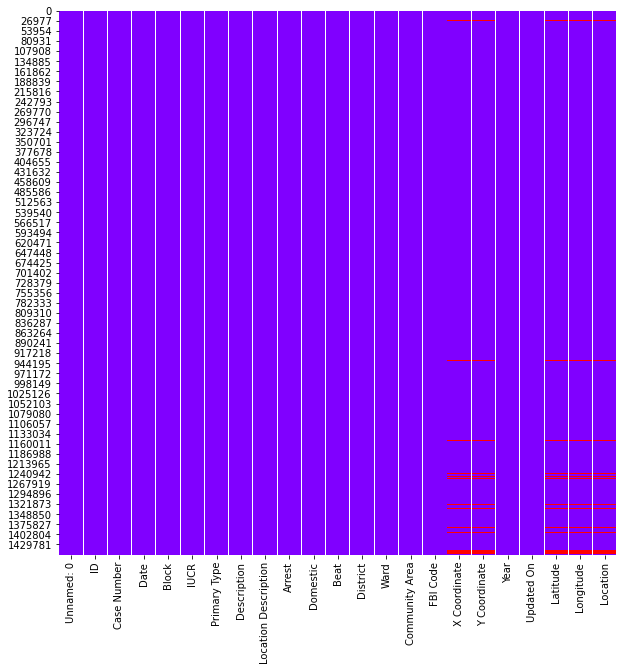

In [4]:
plt.figure(figsize=(10,10))
sns.heatmap(chicago_df.isnull(), cbar=False, cmap='rainbow')

In [5]:
chicago_df.drop(['Unnamed: 0', 'ID', 'Case Number', 'IUCR', 'X Coordinate', 'Y Coordinate', 'Updated On', 'Year', 'FBI Code', 'Beat', 'Ward', 'Community Area', 'Location', 'District', 'Latitude', 'Longitude',], inplace=True, axis=1)

In [6]:
chicago_df.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True
1,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True
2,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False
3,05/03/2016 10:10:00 PM,049XX W FULTON ST,BATTERY,SIMPLE,SIDEWALK,False,False
4,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,THEFT,$500 AND UNDER,RESIDENCE,False,True


In [7]:
chicago_df.Date = pd.to_datetime(chicago_df.Date, format='%m/%d/%Y %I:%M:%S %p')

In [8]:
chicago_df.Date

0         2016-05-03 23:40:00
1         2016-05-03 21:40:00
2         2016-05-03 23:31:00
3         2016-05-03 22:10:00
4         2016-05-03 22:00:00
                  ...        
1456709   2016-05-03 23:33:00
1456710   2016-05-03 23:30:00
1456711   2016-05-03 00:15:00
1456712   2016-05-03 21:07:00
1456713   2016-05-03 23:38:00
Name: Date, Length: 1456714, dtype: datetime64[ns]

In [9]:
chicago_df['Primary Type'].value_counts()

THEFT                                329460
BATTERY                              263700
CRIMINAL DAMAGE                      155455
NARCOTICS                            135240
ASSAULT                               91289
OTHER OFFENSE                         87874
BURGLARY                              83397
DECEPTIVE PRACTICE                    75495
MOTOR VEHICLE THEFT                   61138
ROBBERY                               57313
CRIMINAL TRESPASS                     36912
WEAPONS VIOLATION                     17233
PUBLIC PEACE VIOLATION                13122
OFFENSE INVOLVING CHILDREN            11398
PROSTITUTION                           7633
CRIM SEXUAL ASSAULT                    6823
INTERFERENCE WITH PUBLIC OFFICER       6195
SEX OFFENSE                            4885
HOMICIDE                               2649
ARSON                                  2217
GAMBLING                               2212
LIQUOR LAW VIOLATION                   1953
KIDNAPPING                      

In [10]:
chicago_df['Primary Type'].value_counts().iloc[:15]

THEFT                         329460
BATTERY                       263700
CRIMINAL DAMAGE               155455
NARCOTICS                     135240
ASSAULT                        91289
OTHER OFFENSE                  87874
BURGLARY                       83397
DECEPTIVE PRACTICE             75495
MOTOR VEHICLE THEFT            61138
ROBBERY                        57313
CRIMINAL TRESPASS              36912
WEAPONS VIOLATION              17233
PUBLIC PEACE VIOLATION         13122
OFFENSE INVOLVING CHILDREN     11398
PROSTITUTION                    7633
Name: Primary Type, dtype: int64

In [11]:
order_data = chicago_df['Primary Type'].value_counts().iloc[:15].index

<AxesSubplot:xlabel='count', ylabel='Primary Type'>

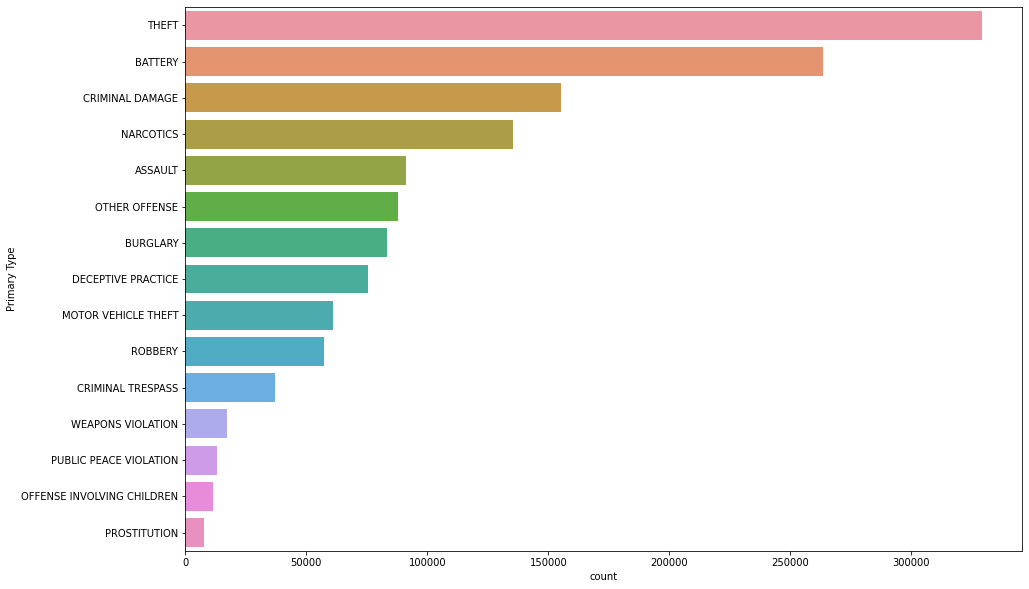

In [12]:
plt.figure(figsize = (15, 10))
sns.countplot(y=chicago_df['Primary Type'], data=chicago_df, order=order_data)

<AxesSubplot:xlabel='count', ylabel='Location Description'>

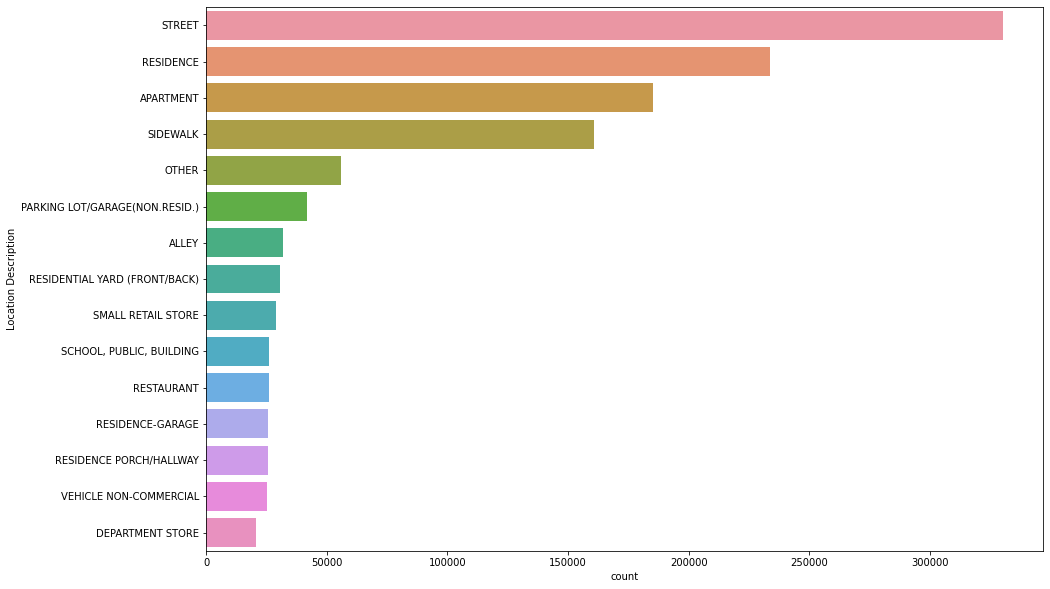

In [13]:
plt.figure(figsize = (15, 10))
sns.countplot(y=chicago_df['Location Description'], data=chicago_df, order=chicago_df['Location Description'].value_counts().iloc[:15].index)

In [14]:
chicago_df.index = pd.DatetimeIndex(chicago_df.Date)

In [15]:
chicago_df.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,
2016-05-03 23:40:00,2016-05-03 23:40:00,013XX S SAWYER AVE,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True
2016-05-03 21:40:00,2016-05-03 21:40:00,061XX S DREXEL AVE,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True
2016-05-03 23:31:00,2016-05-03 23:31:00,053XX W CHICAGO AVE,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False
2016-05-03 22:10:00,2016-05-03 22:10:00,049XX W FULTON ST,BATTERY,SIMPLE,SIDEWALK,False,False
2016-05-03 22:00:00,2016-05-03 22:00:00,003XX N LOTUS AVE,THEFT,$500 AND UNDER,RESIDENCE,False,True


In [16]:
chicago_df.resample('Y').size()   # How many crimes occured in each year

Date
2012-12-31    335670
2013-12-31    306703
2014-12-31    274527
2015-12-31    262995
2016-12-31    265462
2017-12-31     11357
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'Number of Crimes')

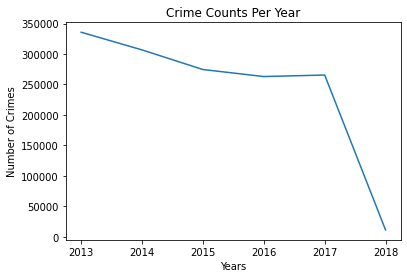

In [17]:
plt.plot(chicago_df.resample('Y').size())
plt.title('Crime Counts Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

Text(0, 0.5, 'Number of Crimes')

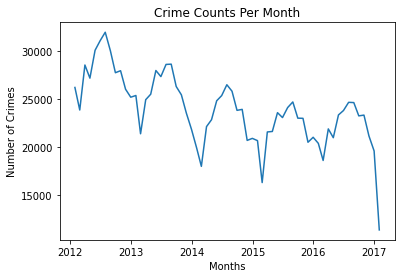

In [18]:
plt.plot(chicago_df.resample('M').size())
plt.title('Crime Counts Per Month')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')

Text(0, 0.5, 'Number of Crimes')

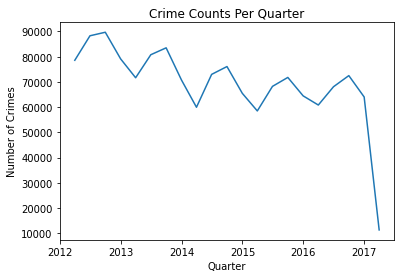

In [19]:
plt.plot(chicago_df.resample('Q').size())
plt.title('Crime Counts Per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Crimes')

In [20]:
# DATA PREPARING

In [21]:
chicago_prophet = chicago_df.resample('M').size().reset_index()

In [22]:
chicago_prophet

,Date,0
0,2012-01-31,26194
1,2012-02-29,23847
2,2012-03-31,28533
3,2012-04-30,27164
4,2012-05-31,30067
...,...,...
56,2016-09-30,23235
57,2016-10-31,23314
58,2016-11-30,21140
59,2016-12-31,19580


In [23]:
chicago_prophet.columns = ['Date', 'Crime Count']

In [24]:
chicago_prophet

,Date,Crime Count
0,2012-01-31,26194
1,2012-02-29,23847
2,2012-03-31,28533
3,2012-04-30,27164
4,2012-05-31,30067
...,...,...
56,2016-09-30,23235
57,2016-10-31,23314
58,2016-11-30,21140
59,2016-12-31,19580


In [25]:
final_df = chicago_prophet.rename(columns={'Date':'ds', 'Crime Count':'y'})

In [26]:
final_df

,ds,y
0,2012-01-31,26194
1,2012-02-29,23847
2,2012-03-31,28533
3,2012-04-30,27164
4,2012-05-31,30067
...,...,...
56,2016-09-30,23235
57,2016-10-31,23314
58,2016-11-30,21140
59,2016-12-31,19580


In [27]:
# MAKING PREDICTIONS

In [28]:
model = Prophet()
model.fit(final_df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Windows10sx\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [29]:
future = model.make_future_dataframe(periods=365)
prediction = model.predict(future)

In [30]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-31,29527.994394,25844.959277,28197.330938,29527.994394,29527.994394,-2468.459617,-2468.459617,-2468.459617,-2468.459617,-2468.459617,-2468.459617,0.0,0.0,0.0,27059.534776
1,2012-02-29,29341.449133,23431.226816,25888.453475,29341.449133,29341.449133,-4698.863062,-4698.863062,-4698.863062,-4698.863062,-4698.863062,-4698.863062,0.0,0.0,0.0,24642.586071
2,2012-03-31,29142.038682,27002.151152,29365.591992,29142.038682,29142.038682,-962.793052,-962.793052,-962.793052,-962.793052,-962.793052,-962.793052,0.0,0.0,0.0,28179.245629
3,2012-04-30,28949.060827,25994.054838,28424.308961,28949.060827,28949.060827,-1744.502016,-1744.502016,-1744.502016,-1744.502016,-1744.502016,-1744.502016,0.0,0.0,0.0,27204.558811
4,2012-05-31,28749.650377,28453.127409,30887.098305,28749.650377,28749.650377,923.679223,923.679223,923.679223,923.679223,923.679223,923.679223,0.0,0.0,0.0,29673.329600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,2018-01-27,20364.951028,30538.149381,32980.676862,20252.461750,20470.377322,11388.799043,11388.799043,11388.799043,11388.799043,11388.799043,11388.799043,0.0,0.0,0.0,31753.750071
422,2018-01-28,20362.251077,26881.352252,29480.569577,20249.112592,20468.097158,7778.941628,7778.941628,7778.941628,7778.941628,7778.941628,7778.941628,0.0,0.0,0.0,28141.192705
423,2018-01-29,20359.551125,23064.941220,25492.438603,20245.861207,20465.816994,3858.619578,3858.619578,3858.619578,3858.619578,3858.619578,3858.619578,0.0,0.0,0.0,24218.170704
424,2018-01-30,20356.851174,18819.494250,21261.250392,20242.868482,20463.536830,-310.998579,-310.998579,-310.998579,-310.998579,-310.998579,-310.998579,0.0,0.0,0.0,20045.852595


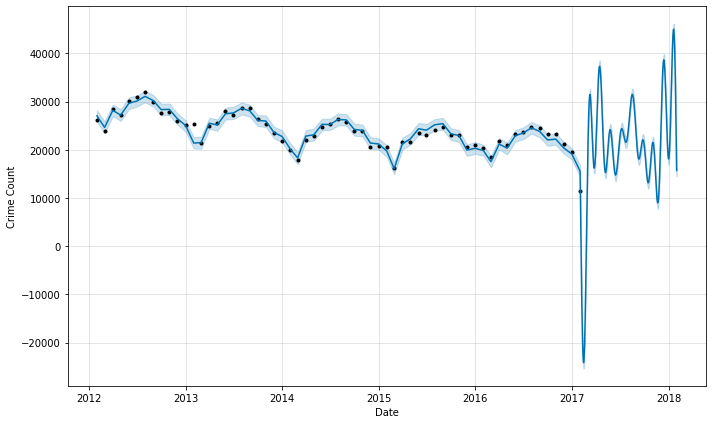

In [34]:
figure = model.plot(prediction, xlabel='Date', ylabel='Crime Count')

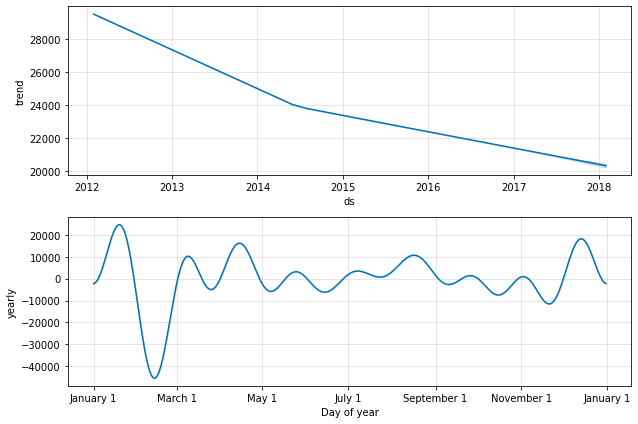

In [35]:
figure = model.plot_components(prediction)

In [43]:
future1 = model.make_future_dataframe(periods=12, freq='M')
prediction1 = model.predict(future1)

In [44]:
prediction1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-31,29527.994394,25878.778394,28271.402645,29527.994394,29527.994394,-2468.459617,-2468.459617,-2468.459617,-2468.459617,-2468.459617,-2468.459617,0.0,0.0,0.0,27059.534776
1,2012-02-29,29341.449133,23401.214758,25856.476240,29341.449133,29341.449133,-4698.863062,-4698.863062,-4698.863062,-4698.863062,-4698.863062,-4698.863062,0.0,0.0,0.0,24642.586071
2,2012-03-31,29142.038682,26911.355987,29354.100152,29142.038682,29142.038682,-962.793052,-962.793052,-962.793052,-962.793052,-962.793052,-962.793052,0.0,0.0,0.0,28179.245629
3,2012-04-30,28949.060827,25906.298623,28328.155999,28949.060827,28949.060827,-1744.502016,-1744.502016,-1744.502016,-1744.502016,-1744.502016,-1744.502016,0.0,0.0,0.0,27204.558811
4,2012-05-31,28749.650377,28469.447430,30826.045576,28749.650377,28749.650377,923.679223,923.679223,923.679223,923.679223,923.679223,923.679223,0.0,0.0,0.0,29673.329600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2017-09-30,20686.245230,19964.119264,22352.715715,20628.125426,20743.487428,486.044351,486.044351,486.044351,486.044351,486.044351,486.044351,0.0,0.0,0.0,21172.289581
69,2017-10-31,20602.546740,19940.420401,22291.097828,20531.188649,20671.587567,554.922402,554.922402,554.922402,554.922402,554.922402,554.922402,0.0,0.0,0.0,21157.469143
70,2017-11-30,20521.548202,17631.113361,20067.446473,20440.028132,20601.926965,-1596.288387,-1596.288387,-1596.288387,-1596.288387,-1596.288387,-1596.288387,0.0,0.0,0.0,18925.259815
71,2017-12-31,20437.849712,16912.115337,19396.245965,20343.542468,20531.643739,-2256.812226,-2256.812226,-2256.812226,-2256.812226,-2256.812226,-2256.812226,0.0,0.0,0.0,18181.037486


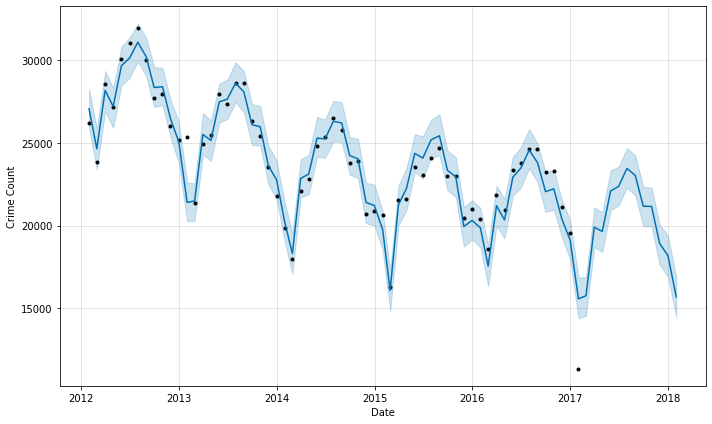

In [45]:
figure = model.plot(prediction1, xlabel='Date', ylabel='Crime Count')

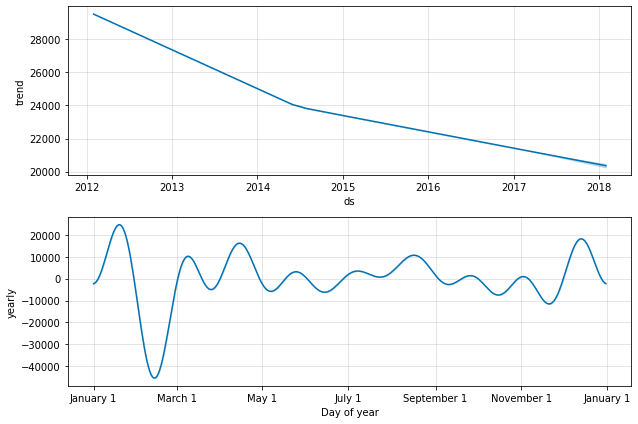

In [47]:
figure = model.plot_components(prediction1)

In [51]:
yhat = prediction1.iloc[60:,-1:]

Text(0, 0.5, 'Crime Rate')

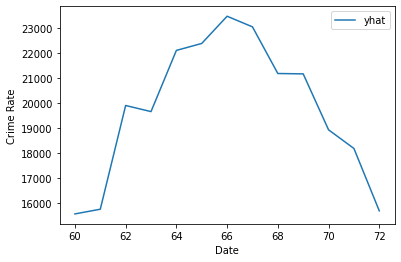

In [66]:
yhat.plot()
plt.xlabel('Date')
plt.ylabel('Crime Rate')